<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [ ]:
# Make sure you have virtualenv installed 
%pip install --user virtualenv

In [ ]:
# To-Do: create a virtual environement called data_analytics
%conda create -n codelabenv

In [ ]:
# Activate the environement 
%source myenv/bin/activate

### 2. Importing necessary tools:<a id='importing'></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [143]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df_housing = pd.read_csv('kc_house_data.csv')

In [144]:
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503


In [68]:
# To-Do: Print the dataframe's shape
df_housing.shape

(21613, 21)

The dataset has 21613 samples and 21 features.

In [69]:
# To-Do: Print the dataframe's info
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

In [70]:
df_housing.isna().sum()

id               0
date             7
price            5
bedrooms         0
bathrooms        0
sqft_living      1
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    0
yr_built         2
yr_renovated     1
zipcode          2
lat              1
long             0
sqft_living15    1
sqft_lot15       0
dtype: int64

### 4. NA handling :<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [145]:
nan_rows = df_housing[df_housing.isna().any(axis=1)]

In [146]:
(len(nan_rows)/len(df_housing))*100

0.11567112386063944

We only have 25 rows

These rows constitute only 0.11% of our dataset. 

We can either drop them or replace numerical values by a statistical measure (mean, mode or median).

In [147]:
len(df_housing) - 25

21588

We would like to perform a difference operation on these two dataframes in order to keep the values that are not NaN values.

In [148]:
set_diff_df = pd.concat([nan_rows,df_housing]).drop_duplicates(keep=False)
set_diff_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,...,8,1530.0,0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,...,8,2310.0,0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,...,7,1020.0,0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,...,8,1600.0,0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287


In [149]:
df_housing = set_diff_df

In [150]:
# This is equivalent
df_housing.dropna(inplace=True)

Now, we are sure we do not have any NaN value in our dataset.

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be deleted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [151]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21588 non-null  int64  
 1   date           21588 non-null  object 
 2   price          21588 non-null  float64
 3   bedrooms       21588 non-null  int64  
 4   bathrooms      21588 non-null  float64
 5   sqft_living    21588 non-null  float64
 6   sqft_lot       21588 non-null  float64
 7   floors         21588 non-null  float64
 8   waterfront     21588 non-null  int64  
 9   view           21588 non-null  int64  
 10  condition      21588 non-null  int64  
 11  grade          21588 non-null  int64  
 12  sqft_above     21588 non-null  float64
 13  sqft_basement  21588 non-null  int64  
 14  yr_built       21588 non-null  float64
 15  yr_renovated   21588 non-null  float64
 16  zipcode        21588 non-null  float64
 17  lat            21588 non-null  float64
 18  long  

Since we already know the date in which these houses were sold, we do not need the `date` column, nor the ``id`` and ``zipcode`` columns. 

In [152]:
# To-Do: delete the columns of the variables that are useless
df_housing = df_housing.drop(['id','date','zipcode'],axis=1)

In [153]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  float64
 4   sqft_lot       21588 non-null  float64
 5   floors         21588 non-null  float64
 6   waterfront     21588 non-null  int64  
 7   view           21588 non-null  int64  
 8   condition      21588 non-null  int64  
 9   grade          21588 non-null  int64  
 10  sqft_above     21588 non-null  float64
 11  sqft_basement  21588 non-null  int64  
 12  yr_built       21588 non-null  float64
 13  yr_renovated   21588 non-null  float64
 14  lat            21588 non-null  float64
 15  long           21588 non-null  float64
 16  sqft_living15  21588 non-null  float64
 17  sqft_lot15     21588 non-null  int64  
dtypes: flo

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

```python
pd.unique(df['column_name'])
```

In [154]:
df_housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,1955.0,0.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,1951.0,1991.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,1933.0,0.0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,1965.0,0.0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,1987.0,0.0,47.6168,-122.045,1800.0,7503


<AxesSubplot:xlabel='yr_built', ylabel='price'>

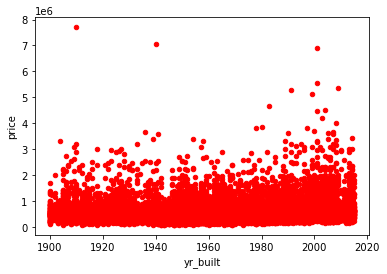

In [155]:
df_housing.plot.scatter(y='price',x='yr_built',c='red')

Houses newly built are generally more expensive.

But this is not a global thing, there are some expensive houses that were built in 1950 and are more expensive than recently built houses.

This is because they got renovated.

In [156]:
df_housing.iloc[1]

price            538000.000
bedrooms              3.000
bathrooms             2.250
sqft_living        2570.000
sqft_lot           7242.000
floors                2.000
waterfront            0.000
view                  0.000
condition             3.000
grade                 7.000
sqft_above         2170.000
sqft_basement       400.000
yr_built           1951.000
yr_renovated       1991.000
lat                  47.721
long               -122.319
sqft_living15      1690.000
sqft_lot15         7639.000
Name: 1, dtype: float64

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

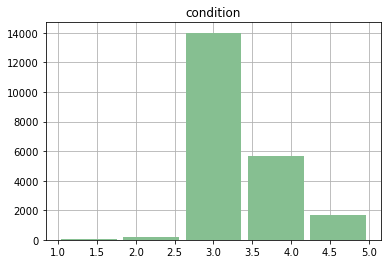

In [157]:
df_housing.hist(column=['condition'],bins=5,figsize=(6,4), color='#86bf91', zorder=2, rwidth=0.9)

A lot of houses are in "average" condition, if we considerate rating them from 0 to 5.

In [158]:
df_housing.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

<AxesSubplot:>

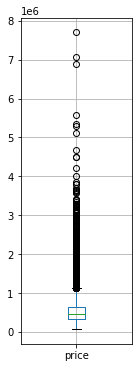

In [159]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
df_housing.boxplot(column='price',figsize=(2,6))

Text(0, 0.5, 'No of houses')

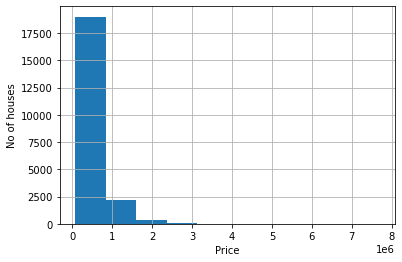

In [160]:
figure=df_housing['price'].hist(bins=10)
figure.set_xlabel('Price')
figure.set_ylabel('No of houses')

<AxesSubplot:xlabel='price'>

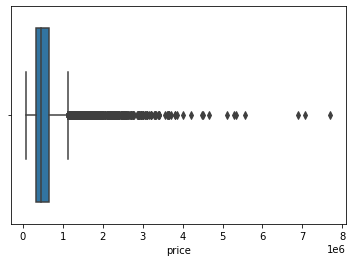

In [161]:
sns.boxplot(x=df_housing['price'])

The points outside of the boxplot are generally outliers.

In [162]:
df_housing['price'].describe()

count    2.158800e+04
mean     5.401545e+05
std      3.671493e+05
min      7.500000e+04
25%      3.219875e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [163]:
df_housing['price_zscore']=(df_housing.price - df_housing.price.mean() ) / df_housing.price.std()

In [164]:
df_housing.shape

(21588, 19)

In [165]:
df_housing_test = df_housing[df_housing['price_zscore'] > 3]

In [166]:
df_housing_test.shape

(405, 19)

Doing that will remove way too many rows... More than 80%.
We may think about changing the $\sigma$ value for droping.

Or maybe consider removing only values higher than the highest price.

In [167]:
df_housing_test = df_housing[df_housing['price_zscore'] > 3]

In [168]:
df_housing_test['price'].describe()

count    4.050000e+02
mean     2.277305e+06
std      7.693614e+05
min      1.646000e+06
25%      1.789950e+06
50%      2.000000e+06
75%      2.500000e+06
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

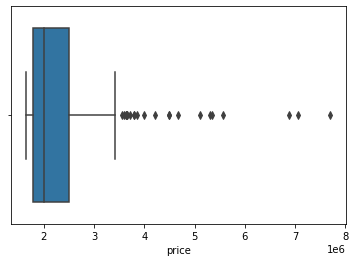

In [169]:
sns.boxplot(x=df_housing_test['price'])

We still have houses with really high values (over 650k $).

In [170]:
df_housing.sort_values(by=['price'],ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_zscore
7252,7700000.0,6,8.00,12050.0,27600.0,2.5,0,3,4,13,8570.0,3480,1910.0,1987.0,47.6298,-122.323,3940.0,8800,19.501181
3914,7062500.0,5,4.50,10040.0,37325.0,2.0,1,2,3,11,7680.0,2360,1940.0,2001.0,47.6500,-122.214,3930.0,25449,17.764830
9254,6885000.0,6,7.75,9890.0,31374.0,2.0,0,4,3,13,8860.0,1030,2001.0,0.0,47.6305,-122.240,4540.0,42730,17.281376
4411,5570000.0,5,5.75,9200.0,35069.0,2.0,0,0,3,13,6200.0,3000,2001.0,0.0,47.6289,-122.233,3560.0,24345,13.699727
1448,5350000.0,5,5.00,8000.0,23985.0,2.0,0,4,3,12,6720.0,1280,2009.0,0.0,47.6232,-122.220,4600.0,21750,13.100516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,82000.0,3,1.00,860.0,10426.0,1.0,0,0,3,6,860.0,0,1954.0,0.0,47.4987,-122.341,1140.0,11250,-1.247870
16198,81000.0,2,1.00,730.0,9975.0,1.0,0,0,1,5,730.0,0,1943.0,0.0,47.4808,-122.315,860.0,9000,-1.250593
465,80000.0,1,0.75,430.0,5050.0,1.0,0,0,2,4,430.0,0,1912.0,0.0,47.6499,-121.909,1200.0,7500,-1.253317
15293,78000.0,2,1.00,780.0,16344.0,1.0,0,0,1,5,780.0,0,1942.0,0.0,47.4739,-122.280,1700.0,10387,-1.258764


In [171]:
df_filtered = df_housing[df_housing['price'] >= 6500000.0]

In [172]:
df_filtered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_zscore
3914,7062500.0,5,4.50,10040.0,37325.0,2.0,1,2,3,11,7680.0,2360,1940.0,2001.0,47.6500,-122.214,3930.0,25449,17.764830
7252,7700000.0,6,8.00,12050.0,27600.0,2.5,0,3,4,13,8570.0,3480,1910.0,1987.0,47.6298,-122.323,3940.0,8800,19.501181
9254,6885000.0,6,7.75,9890.0,31374.0,2.0,0,4,3,13,8860.0,1030,2001.0,0.0,47.6305,-122.240,4540.0,42730,17.281376


In [185]:
df_housing.drop(columns=['price_zscore'],inplace=True)

In [173]:
df_filtered.shape

(3, 19)

In [174]:
test = df_housing.copy()

In [175]:
test.shape

(21588, 19)

This is better, we can know get rid of these 3 values.

```python
df = df.drop(df[<some boolean condition>].index)
```

In [177]:
test.drop(test[test['price'] >= 6500000.0].index, inplace = True)

In [178]:
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price_zscore
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,1955.0,0.0,47.5112,-122.257,1340.0,5650,-0.866826
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,1951.0,1991.0,47.7210,-122.319,1690.0,7639,-0.005868
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,1933.0,0.0,47.7379,-122.233,2720.0,8062,-0.980948
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,1965.0,0.0,47.5208,-122.393,1360.0,5000,0.173895
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,1987.0,0.0,47.6168,-122.045,1800.0,7503,-0.082131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0,2009.0,0.0,47.6993,-122.346,1530.0,1509,-0.490684
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0,2014.0,0.0,47.5107,-122.362,1830.0,7200,-0.381737
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0,2009.0,0.0,47.5944,-122.299,1020.0,2007,-0.376015
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0,2004.0,0.0,47.5345,-122.069,1410.0,1287,-0.381737


<AxesSubplot:xlabel='price'>

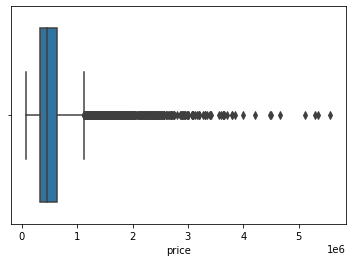

In [180]:
sns.boxplot(x=test['price'])

In [186]:
df_housing = test
df_housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,1955.0,0.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,1951.0,1991.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,1933.0,0.0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,1965.0,0.0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,1987.0,0.0,47.6168,-122.045,1800.0,7503


### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

In [187]:
# To-Do : perform feature selection using correlation
corr_housing = df_housing.corr()

<AxesSubplot:>

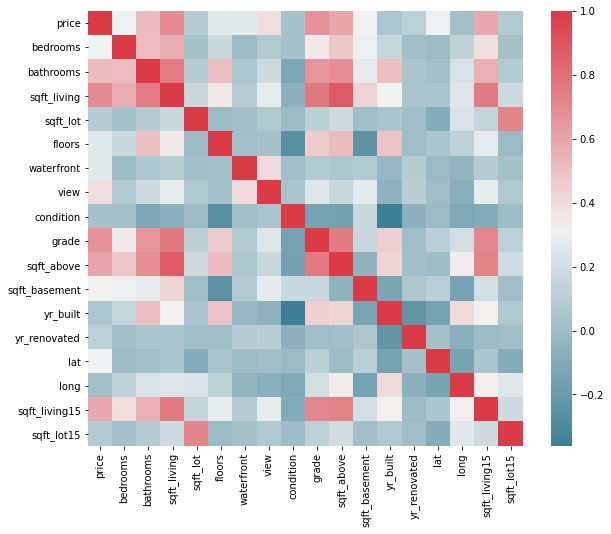

In [188]:
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_housing, mask=np.zeros_like(corr_housing, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,ax=ax)

I set the threshold of "highly correlated" to 0.8.

In [189]:
# To-Do : drop the variables that seem highly correlated to you
columns = np.full((corr_housing.shape[0],), True, dtype=bool)
for i in range(corr_housing.shape[0]):
    for j in range(i+1, corr_housing.shape[0]):
        if corr_housing.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

In [190]:
selected_columns = df_housing.columns[columns]

In [191]:
len(df_housing.columns)

18

In [192]:
len(selected_columns)

17

In [193]:
new_df_housing = df_housing[selected_columns]
new_df_housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,0,1955.0,0.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,400,1951.0,1991.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,0,1933.0,0.0,47.7379,-122.233,2720.0,8062
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,910,1965.0,0.0,47.5208,-122.393,1360.0,5000
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,0,1987.0,0.0,47.6168,-122.045,1800.0,7503


In [194]:
df_housing = new_df_housing

Now, we have pretty *"clean"* data, we can go and test them on our model.

### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [195]:
# Splitting the data into dependant and independant variables
X = df_housing.drop(['price'],axis = 1)
y = df_housing['price']

In [196]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21585 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21585 non-null  int64  
 1   bathrooms      21585 non-null  float64
 2   sqft_living    21585 non-null  float64
 3   sqft_lot       21585 non-null  float64
 4   floors         21585 non-null  float64
 5   waterfront     21585 non-null  int64  
 6   view           21585 non-null  int64  
 7   condition      21585 non-null  int64  
 8   grade          21585 non-null  int64  
 9   sqft_basement  21585 non-null  int64  
 10  yr_built       21585 non-null  float64
 11  yr_renovated   21585 non-null  float64
 12  lat            21585 non-null  float64
 13  long           21585 non-null  float64
 14  sqft_living15  21585 non-null  float64
 15  sqft_lot15     21585 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 2.8 MB


In [197]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [198]:
theta,beta_0 = model.coef_,model.intercept_

In [199]:
a = ''
for count, value in enumerate(model.coef_):
  if count == 0:
    a = a + '' + str(value) + '+'
  else:
    a = a + str(value) + 'x^' + str(count) + '+'

In [200]:
print('y = {} {}'.format(a,beta_0))

y = -30465.408680587767+40520.798333726954x^1+163.1458057465843x^2+0.14668663460179232x^3+3941.894064375642x^4+575062.9729246044x^5+48753.77168754997x^6+31596.546999481005x^7+100274.88357436948x^8+-27.343960343820527x^9+-2416.6288523816183x^10+19.81946537604668x^11+560363.4023745281x^12+-113238.31225002499x^13+34.49035511018883x^14+-0.37796853741747327x^15+ -36466585.62640041


Our equation has 17 coefficients as expected (equal to the number of features).

In [201]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
r_squared = model.score(X,y)

In [202]:
print('R² value : {}'.format(r_squared))

R² value : 0.6995176303668038


## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.